In [42]:
import torch
from pathlib import Path
import requests

DATA_PATH = Path("data/")

IMAGE_PATH = DATA_PATH / "pizza-steak-sushi"

if IMAGE_PATH.is_dir():
  pass
else:
  print(f"Creating the {IMAGE_PATH} directory...")
  IMAGE_PATH.mkdir(exist_ok=True, parents=True)

with open(DATA_PATH / "pizza-steak-sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

In [43]:
import zipfile

with zipfile.ZipFile(DATA_PATH / "pizza-steak-sushi.zip", 'r') as zip_ref:
  print("Unzipping the pizza, sushi and steak...")
  zip_ref.extractall(IMAGE_PATH)

Unzipping the pizza, sushi and steak...


In [44]:
import os
def walk_dir(dir_path):
  """young jesus"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [45]:
walk_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza-steak-sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/train'
There are 0 directories and 72 images in 'data/pizza-steak-sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza-steak-sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza-steak-sushi/train/pizza'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/test'
There are 0 directories and 31 images in 'data/pizza-steak-sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza-steak-sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza-steak-sushi/test/pizza'


In [46]:
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

Image name is pizza
Image height is 512
Image width is 512


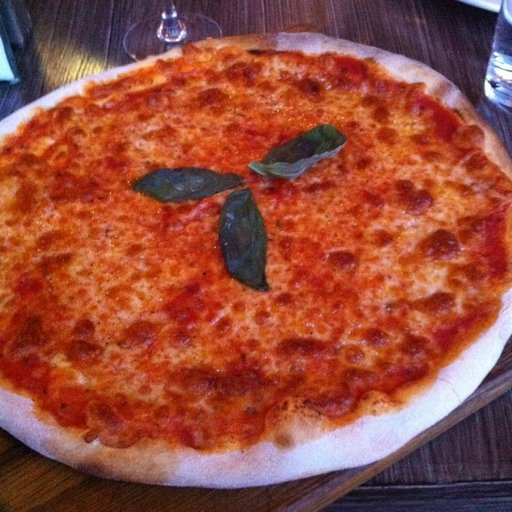

In [47]:
import random
from PIL import Image
image_path_list = list(IMAGE_PATH.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
random_image_path

img = Image.open(random_image_path)
img_class = random_image_path.parent.stem
print(f'Image name is {img_class}')
print(f'Image height is {img.height}')
print(f'Image width is {img.width}')
img

<Figure size 1400x900 with 0 Axes>

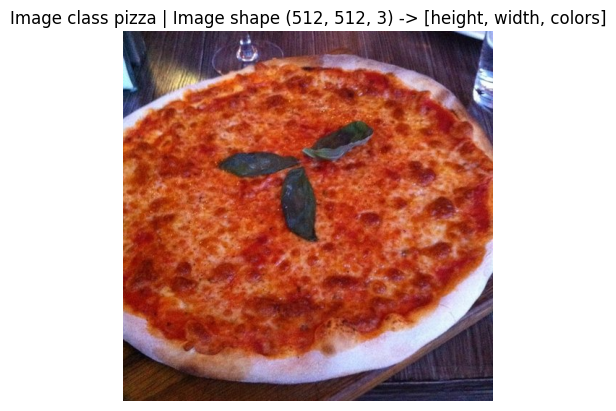

<Figure size 1400x900 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f"Image class {img_class} | Image shape {img_as_array.shape} -> [height, width, colors]")
plt.axis(False)
plt.figure(figsize=(14,9))

array([[[ 20,  40,  51],
        [ 26,  46,  57],
        [ 30,  47,  63],
        ...,
        [154, 174, 237],
        [166, 184, 248],
        [167, 185, 249]],

       [[ 10,  30,  41],
        [ 20,  40,  51],
        [ 24,  41,  57],
        ...,
        [155, 175, 238],
        [168, 186, 250],
        [170, 188, 252]],

       [[ 11,  29,  41],
        [ 21,  39,  51],
        [ 18,  35,  51],
        ...,
        [157, 175, 237],
        [168, 183, 248],
        [170, 185, 250]],

       ...,

       [[ 37,  20,  10],
        [ 45,  29,  16],
        [ 49,  33,  20],
        ...,
        [ 44,  45,  75],
        [ 35,  36,  66],
        [ 25,  26,  56]],

       [[ 29,  15,   6],
        [ 42,  28,  17],
        [ 55,  38,  28],
        ...,
        [ 42,  46,  75],
        [ 35,  39,  68],
        [ 33,  37,  66]],

       [[ 39,  25,  16],
        [ 44,  30,  21],
        [ 47,  30,  20],
        ...,
        [ 44,  48,  77],
        [ 39,  43,  72],
        [ 46,  50,  79]]], dtype=uint8)
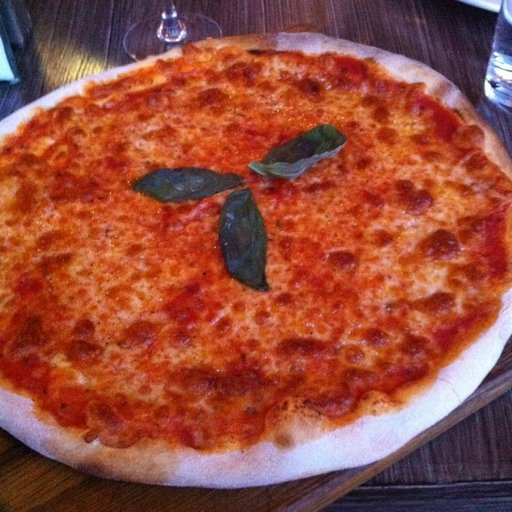

In [49]:
img_as_array

In [50]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.6275, 0.6863, 0.8157,  ..., 0.1647, 0.1725, 0.1255],
         [0.6667, 0.4510, 0.3373,  ..., 0.1686, 0.1882, 0.1020],
         [0.4706, 0.2510, 0.0980,  ..., 0.1765, 0.1804, 0.0941],
         ...,
         [0.1294, 0.1373, 0.1294,  ..., 0.3569, 0.3490, 0.3373],
         [0.1922, 0.1843, 0.1765,  ..., 0.3569, 0.3412, 0.2980],
         [0.1725, 0.1843, 0.1686,  ..., 0.3255, 0.3020, 0.2235]],

        [[0.7059, 0.7569, 0.8745,  ..., 0.1686, 0.2078, 0.1804],
         [0.7529, 0.5059, 0.3765,  ..., 0.1765, 0.2353, 0.1686],
         [0.5529, 0.2706, 0.0902,  ..., 0.2000, 0.2353, 0.1686],
         ...,
         [0.1294, 0.1333, 0.1255,  ..., 0.1882, 0.2000, 0.1922],
         [0.2000, 0.1882, 0.1804,  ..., 0.1804, 0.1882, 0.1725],
         [0.1765, 0.1804, 0.1725,  ..., 0.1647, 0.1725, 0.1373]],

        [[0.9137, 0.8902, 0.9451,  ..., 0.2157, 0.2863, 0.2627],
         [0.8980, 0.6510, 0.4510,  ..., 0.2471, 0.3333, 0.2549],
         [0.7176, 0.4549, 0.1647,  ..., 0.2863, 0.3569, 0.

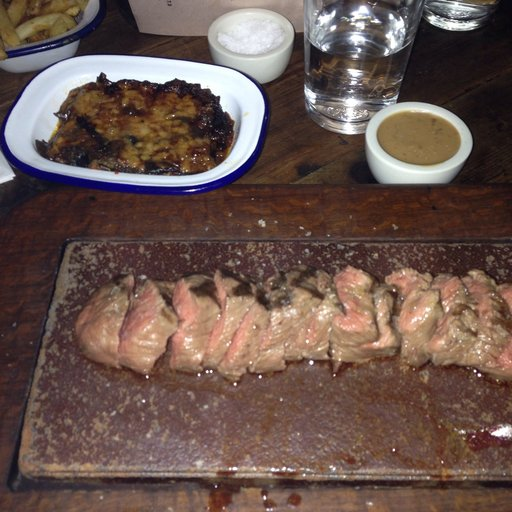

In [51]:
Image.open(image_path_list[78])

In [52]:
def plot_transform_images(
    image_path_list: list,
    transform,
    n=3,
    seed=None
):
  if seed:
    torch.manual_seed(seed)
  rand_img_path_list = random.sample(image_path_list, k=n)
  for rand_img in rand_img_path_list:
    with Image.open(rand_img) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed Image\nShape: {transformed_img.shape}")
      ax[1].axis("off")

      class_name = rand_img.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)


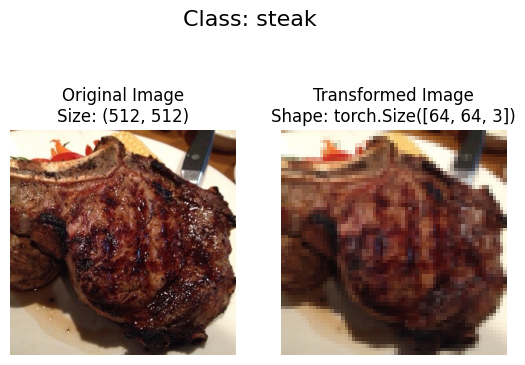

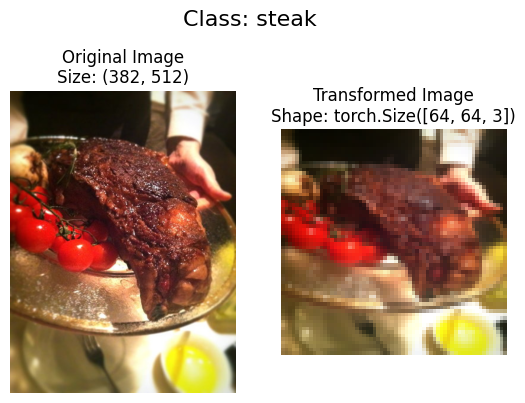

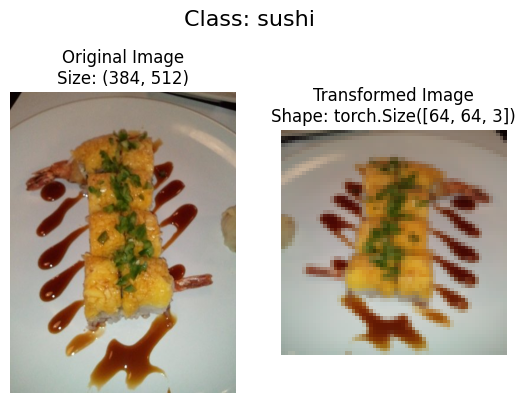

In [53]:
plot_transform_images(image_path_list, data_transform, seed=42)

In [54]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [55]:
len(train_data), len(test_data)

(225, 75)

In [56]:
img, label = train_data[0][0], train_data[0][1]

print(f"Train data shape -> {img.size}")
print(f"Image shape -> {img.shape}")
print(f"Image dtype -> {img.dtype}")
print(f"Label type -> {type(label)}")
print(f"Image tensor -> {img}")

Train data shape -> <built-in method size of Tensor object at 0x7b13f17a3880>
Image shape -> torch.Size([3, 64, 64])
Image dtype -> torch.float32
Label type -> <class 'int'>
Image tensor -> tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

In [57]:
class_dict = train_data.class_to_idx

In [58]:
class_names = train_data.classes


In [59]:
img_permuted = img.permute(1,2,0)

(-0.5, 63.5, 63.5, -0.5)

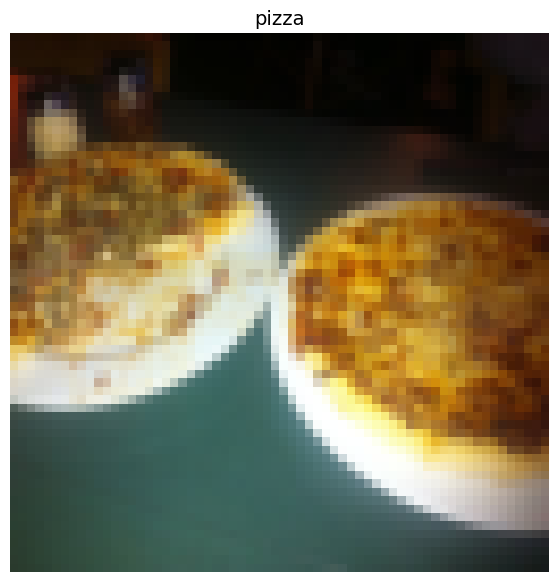

In [60]:
plt.figure(figsize=(10,7))
plt.title(class_names[label], fontsize=14)
plt.imshow(img_permuted)
plt.axis("off")

In [61]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [62]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count())

In [63]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [64]:
img, label = next(iter(train_dataloader))

In [65]:
import os
def find_classes(target_dir: str):
  classes = sorted([entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir()])

  if not classes:
    raise FileNotFoundError("Classes doesn't exist!")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [66]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [67]:
from torch.utils.data import Dataset
from typing import Tuple, List

In [68]:
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform=None):
        self.paths = list(Path(target_dir).glob("*/*.jpg"))  # expects train/pizza/image.jpg
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_image(self, idx: int):
        img_path = self.paths[idx]
        return Image.open(img_path)

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, int]:  # Update the return type
        self.img = self.load_image(idx)
        self.class_name = self.paths[idx].parent.name
        self.class_idx = self.class_to_idx[self.class_name]

        if self.transform:
            self.img = self.transform(self.img)

        return self.img, self.class_idx # Return class name along with image and index


In [69]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [70]:
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                      transform = train_transforms)

In [71]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

torch.Size([3, 64, 64])


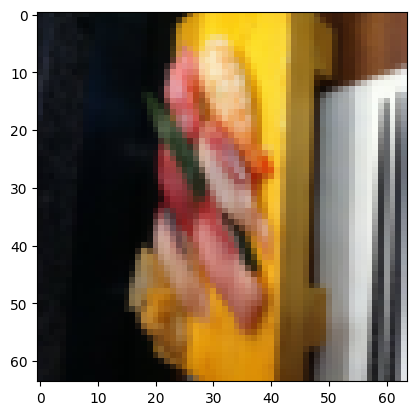

In [72]:
img, class_idx= train_data_custom.__getitem__(2)

print(img.shape)  # This will print the class name.
img = img.permute(2,1,0)
plt.imshow(img)

In [73]:
for data in train_data_custom:
  print(data)
  break

(tensor([[[0.0627, 0.0588, 0.0588,  ..., 0.0863, 0.0902, 0.0863],
         [0.0706, 0.0706, 0.0784,  ..., 0.0902, 0.0863, 0.0863],
         [0.0784, 0.1098, 0.2863,  ..., 0.0824, 0.0824, 0.0863],
         ...,
         [0.8118, 0.8471, 0.8588,  ..., 0.7647, 0.7686, 0.7725],
         [0.5294, 0.5882, 0.6706,  ..., 0.7137, 0.6627, 0.5961],
         [0.3882, 0.3765, 0.4039,  ..., 0.3882, 0.2902, 0.2235]],

        [[0.0549, 0.0510, 0.0549,  ..., 0.0863, 0.0902, 0.0863],
         [0.0627, 0.0627, 0.0784,  ..., 0.0902, 0.0863, 0.0863],
         [0.0667, 0.0980, 0.2863,  ..., 0.0824, 0.0824, 0.0863],
         ...,
         [0.4471, 0.4039, 0.3608,  ..., 0.2235, 0.2235, 0.2314],
         [0.3725, 0.4118, 0.4549,  ..., 0.2196, 0.2118, 0.2039],
         [0.2627, 0.2627, 0.2863,  ..., 0.1333, 0.1137, 0.1059]],

        [[0.0667, 0.0627, 0.0706,  ..., 0.1176, 0.1216, 0.1255],
         [0.0745, 0.0745, 0.0863,  ..., 0.1216, 0.1176, 0.1255],
         [0.0824, 0.1098, 0.2863,  ..., 0.1137, 0.1137, 0

In [74]:
from typing import Tuple

In [75]:
class_names

['pizza', 'steak', 'sushi']

In [111]:
def display_rand_img(dataset: torch.utils.data.Dataset,
                  class_names: List,
                  n: int = 10,
                  display_shape: bool = None,
                  seed: int = None):
  if seed:
    torch.manual_seed(42)
  if n > 10:
    n = 10
    print(f"Due to the n > 10, shape won't appear!")
    display_shape = False
  plt.figure(figsize=(14,6))
  target_samples_idx = random.sample(range(len(dataset)), k=n)
  for i, target_sample in enumerate(target_samples_idx):
    target_img, target_label = train_data[target_sample]
    targ_img_adjust = target_img.permute(1,2,0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    if class_names:
      title = f"Class: {class_names[target_label]}"
      if display_shape:
        title += f"\nShape: {targ_img_adjust.shape}"
    plt.title(title)
    plt.axis("off")

Due to the n > 10, shape won't appear!


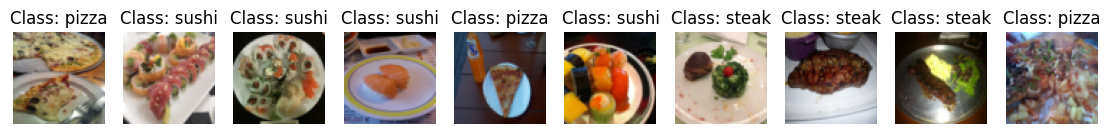

In [112]:
display_rand_img(train_data,
                 class_names=class_names,
                 n=1000000,
                 display_shape=True,
                 seed=42)

In [113]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle = True,
                                     num_workers=os.cpu_count())

test_dataloader_custom = DataLoader(test_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle = True,
                                     num_workers=os.cpu_count())

In [114]:
train_dataloader_custom

In [115]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape

torch.Size([32, 3, 64, 64])

In [116]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                    transforms.ToTensor()])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                    transforms.ToTensor()])


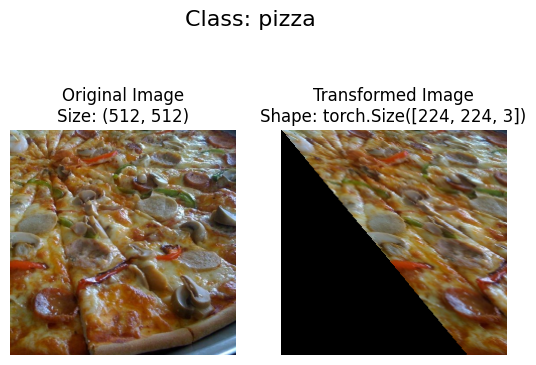

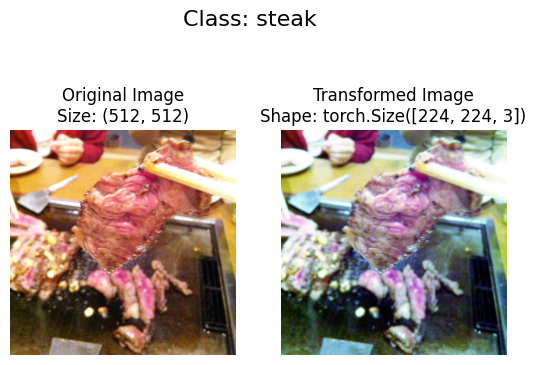

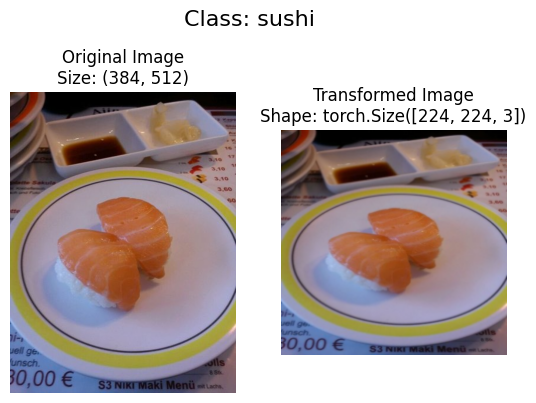

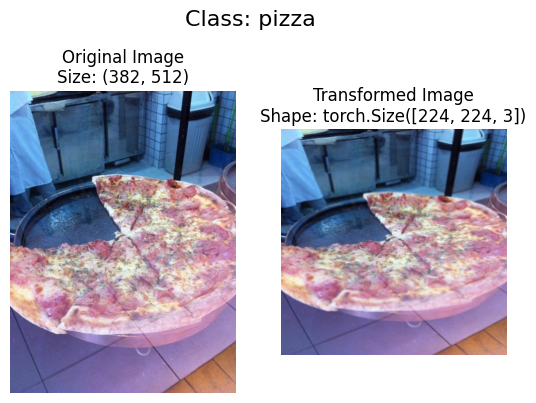

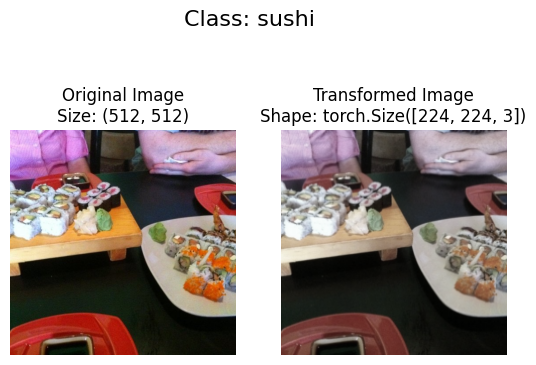

In [117]:
# plot the random images

plot_transform_images(
    transform=train_transform,
    image_path_list=image_path_list,
    n=5,
)

In [118]:
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [119]:
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count())

In [133]:
def DataLoader(dataset: torch.utils.data.Dataset,
               batch_size: int,
               num_workers: int):
    batches = []
    start = 0
    while start < len(dataset):
        # Append a batch of data from the dataset
        batches.append(dataset[start:start+batch_size])
        start += batch_size  # Increment by batch_size
    return batches


In [134]:
len(train_data)

225

In [135]:
list = [1,2,3,4,5,6]
a = list[0:]
a

[1, 2, 3, 4, 5, 6]

In [136]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

In [137]:
train_data_simple

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza-steak-sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [138]:
simple_train_dataloader = DataLoader(train_data_simple,
                                     batch_size=32,
                                     num_workers=0)

ValueError: too many values to unpack (expected 2)